In [1]:
import netCDF4 as nc
import numpy as np 
import matplotlib.pyplot as plt
import os
import glob
import datetime as dt
import subprocess
import cmocean
import datetime

from salishsea_tools import nc_tools, viz_tools

%matplotlib inline

In [2]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.titlesize'] = 18

In [43]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
f2015top = nc.Dataset('/data/vdo/MEOPAR/for-devin/seasonal-30_2015.nc')
f2016top = nc.Dataset('/data/vdo/MEOPAR/for-devin/seasonal-30_2016.nc')
f2017top = nc.Dataset('/data/vdo/MEOPAR/for-devin/seasonal-30_2017.nc')
f2015deep = nc.Dataset('/data/vdo/MEOPAR/for-devin/seasonal_deepest_cell_2015.nc')
f2016deep = nc.Dataset('/data/vdo/MEOPAR/for-devin/seasonal_deepest_cell_2016.nc')
f2017deep = nc.Dataset('/data/vdo/MEOPAR/for-devin/seasonal_deepest_cell_2017.nc')

In [4]:
t_averages = (f2015top.variables['votemperoverdepth'][:] 
              + f2016top.variables['votemperoverdepth'][:]
              + f2017top.variables['votemperoverdepth'][:])/3
s_averages = (f2015top.variables['vosalineoverdepth'][:] 
              + f2016top.variables['vosalineoverdepth'][:]
              + f2017top.variables['vosalineoverdepth'][:])/3

In [5]:
mesh = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')

In [13]:
for n in range(4):
    i = np.ma.masked_array(t_averages[n,...],
                                           mask = 1 - mesh.variables['tmask'][0,22,...])
    print(i.min(), i.max())

7.2639823 10.312704
7.096502 10.777587
7.9541454 15.794952
8.623136 14.324722


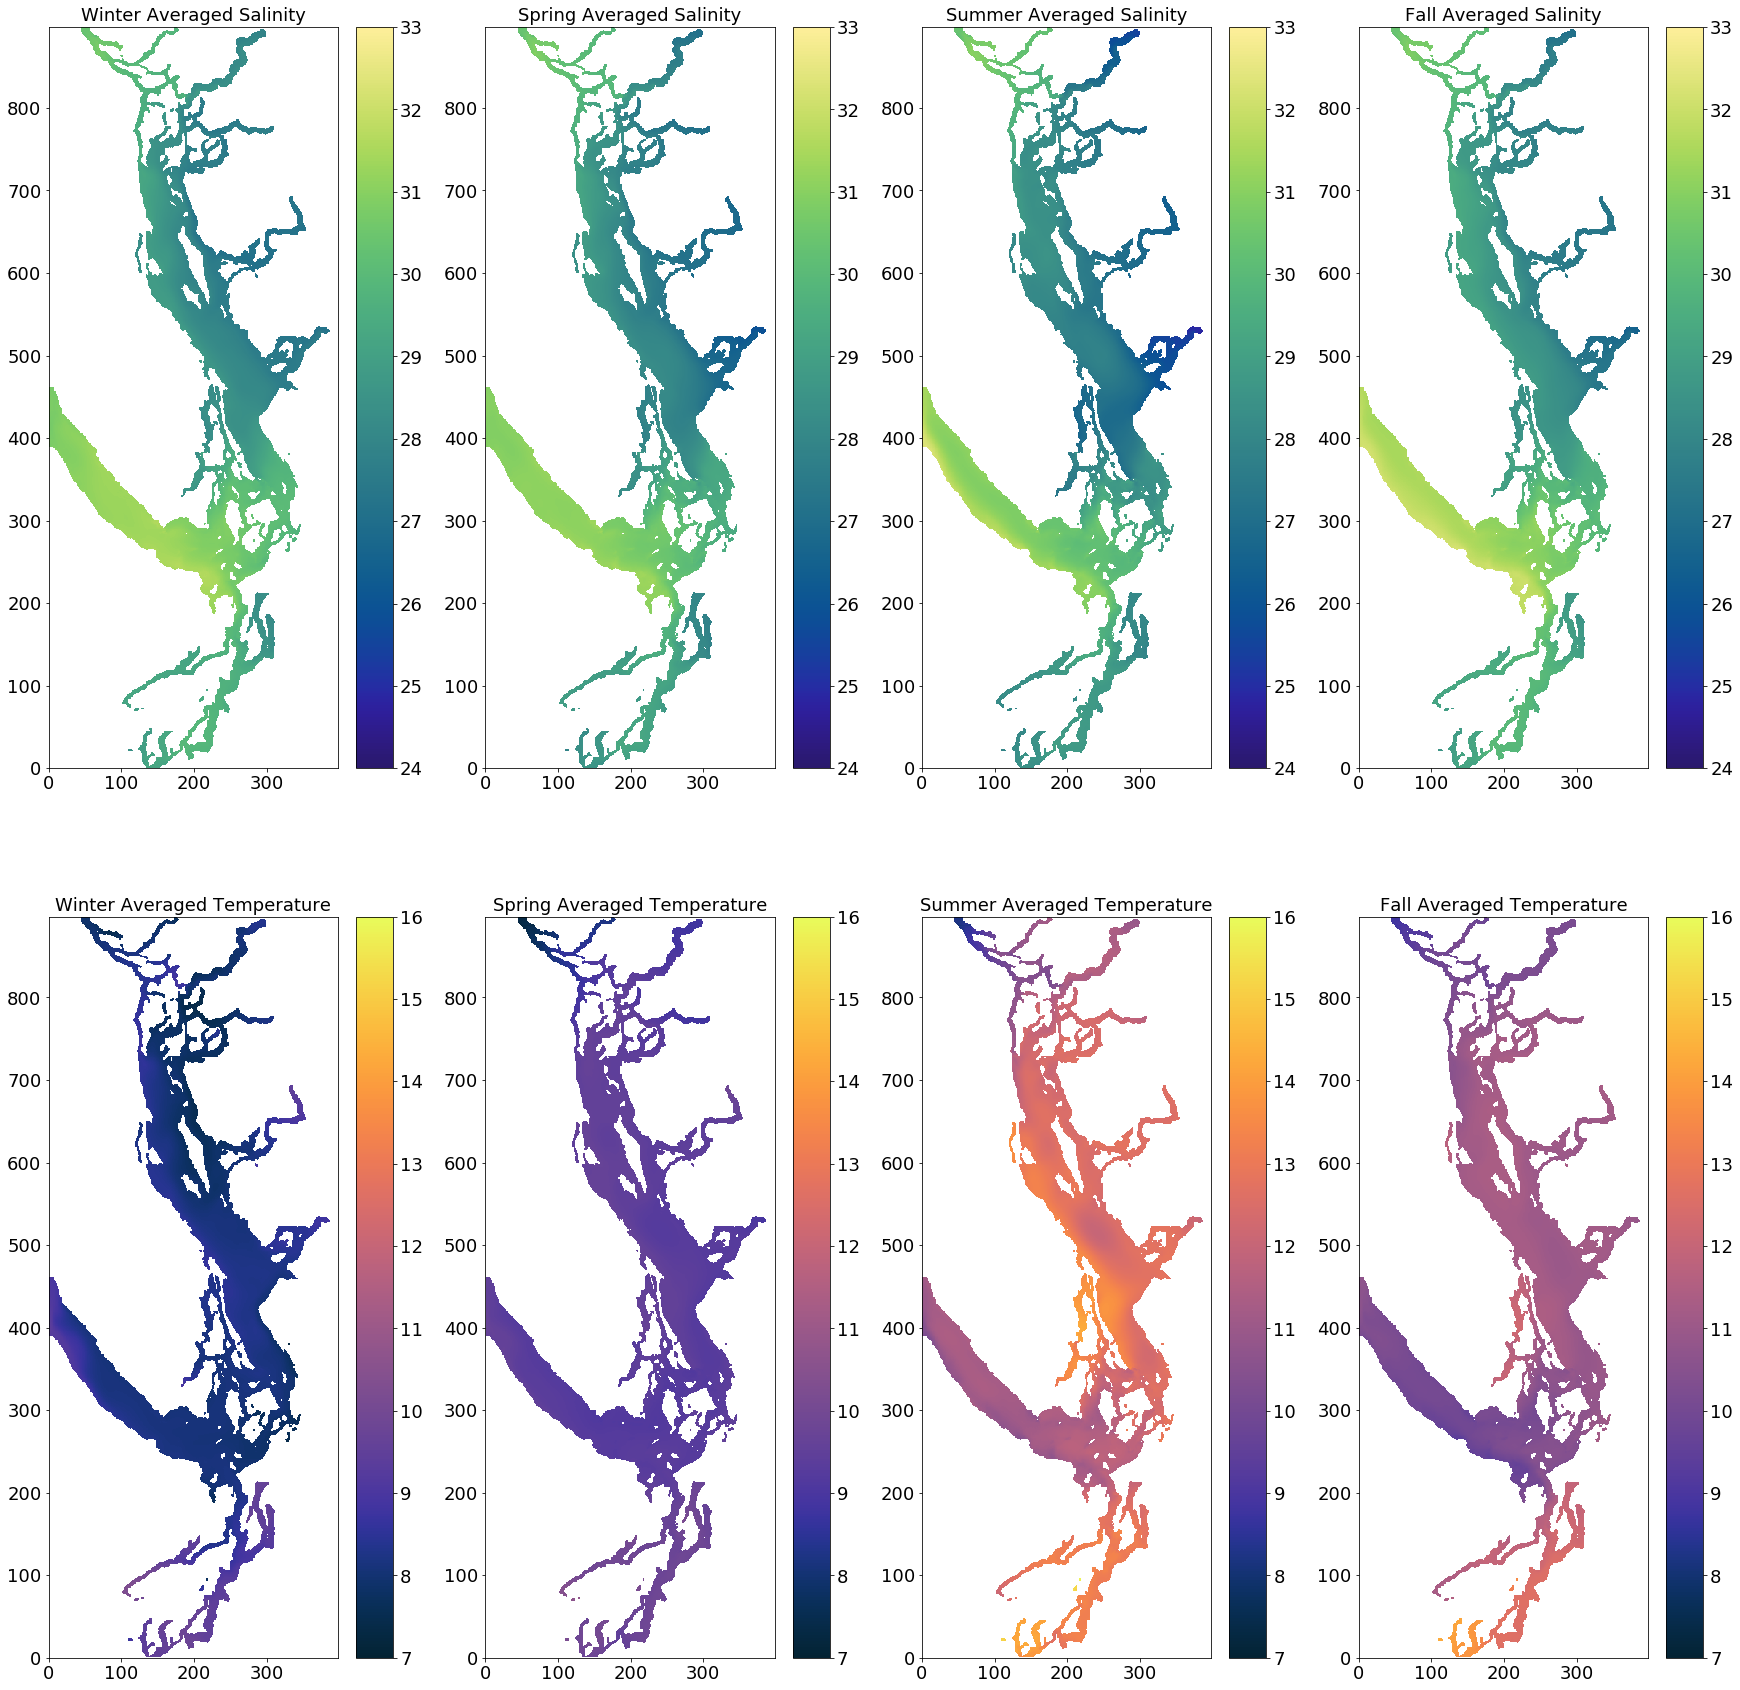

In [12]:
fig, axs = plt.subplots(2,4,figsize = (30,30))
s = axs[0,0].pcolormesh(np.ma.masked_array(s_averages[0,...],
                                           mask = 1 - mesh.variables['tmask'][0,22,...]), 
                        cmap = cmocean.cm.haline, vmin = 24, vmax = 33)
fig.colorbar(s, ax=axs[0,0])
viz_tools.set_aspect(axs[0,0])
axs[0,0].set_title('Winter Averaged Salinity')
t = axs[1,0].pcolormesh(np.ma.masked_array(t_averages[0,...],
                                           mask = 1 - mesh.variables['tmask'][0,22,...]), 
                        cmap = cmocean.cm.thermal, vmin = 7, vmax = 16)
fig.colorbar(t, ax=axs[1,0])
viz_tools.set_aspect(axs[1,0])
axs[1,0].set_title('Winter Averaged Temperature')

s = axs[0,1].pcolormesh(np.ma.masked_array(s_averages[1,...],
                                           mask = 1 - mesh.variables['tmask'][0,22,...]), 
                        cmap = cmocean.cm.haline, vmin = 24, vmax = 33)
fig.colorbar(s, ax=axs[0,1])
viz_tools.set_aspect(axs[0,1])
axs[0,1].set_title('Spring Averaged Salinity')
t = axs[1,1].pcolormesh(np.ma.masked_array(t_averages[1,...],
                                           mask = 1 - mesh.variables['tmask'][0,22,...]), 
                        cmap = cmocean.cm.thermal, vmin = 7, vmax = 16)
fig.colorbar(t, ax=axs[1,1])
viz_tools.set_aspect(axs[1,1])
axs[1,1].set_title('Spring Averaged Temperature')

s = axs[0,2].pcolormesh(np.ma.masked_array(s_averages[2,...],
                                           mask = 1 - mesh.variables['tmask'][0,22,...]), 
                        cmap = cmocean.cm.haline, vmin = 24, vmax = 33)
fig.colorbar(s, ax=axs[0,2])
viz_tools.set_aspect(axs[0,2])
axs[0,2].set_title('Summer Averaged Salinity')
t = axs[1,2].pcolormesh(np.ma.masked_array(t_averages[2,...],
                                           mask = 1 - mesh.variables['tmask'][0,22,...]), 
                        cmap = cmocean.cm.thermal, vmin = 7, vmax = 16)
fig.colorbar(t, ax=axs[1,2])
viz_tools.set_aspect(axs[1,2])
axs[1,2].set_title('Summer Averaged Temperature')

s = axs[0,3].pcolormesh(np.ma.masked_array(s_averages[3,...],
                                           mask = 1 - mesh.variables['tmask'][0,22,...]), 
                        cmap = cmocean.cm.haline, vmin = 24, vmax = 33)
fig.colorbar(s, ax=axs[0,3])
viz_tools.set_aspect(axs[0,3])
axs[0,3].set_title('Fall Averaged Salinity')
t = axs[1,3].pcolormesh(np.ma.masked_array(t_averages[3,...],
                                           mask = 1 - mesh.variables['tmask'][0,22,...]), 
                        cmap = cmocean.cm.thermal, vmin = 7, vmax = 16)
fig.colorbar(t, ax=axs[1,3])
viz_tools.set_aspect(axs[1,3])
axs[1,3].set_title('Fall Averaged Temperature');

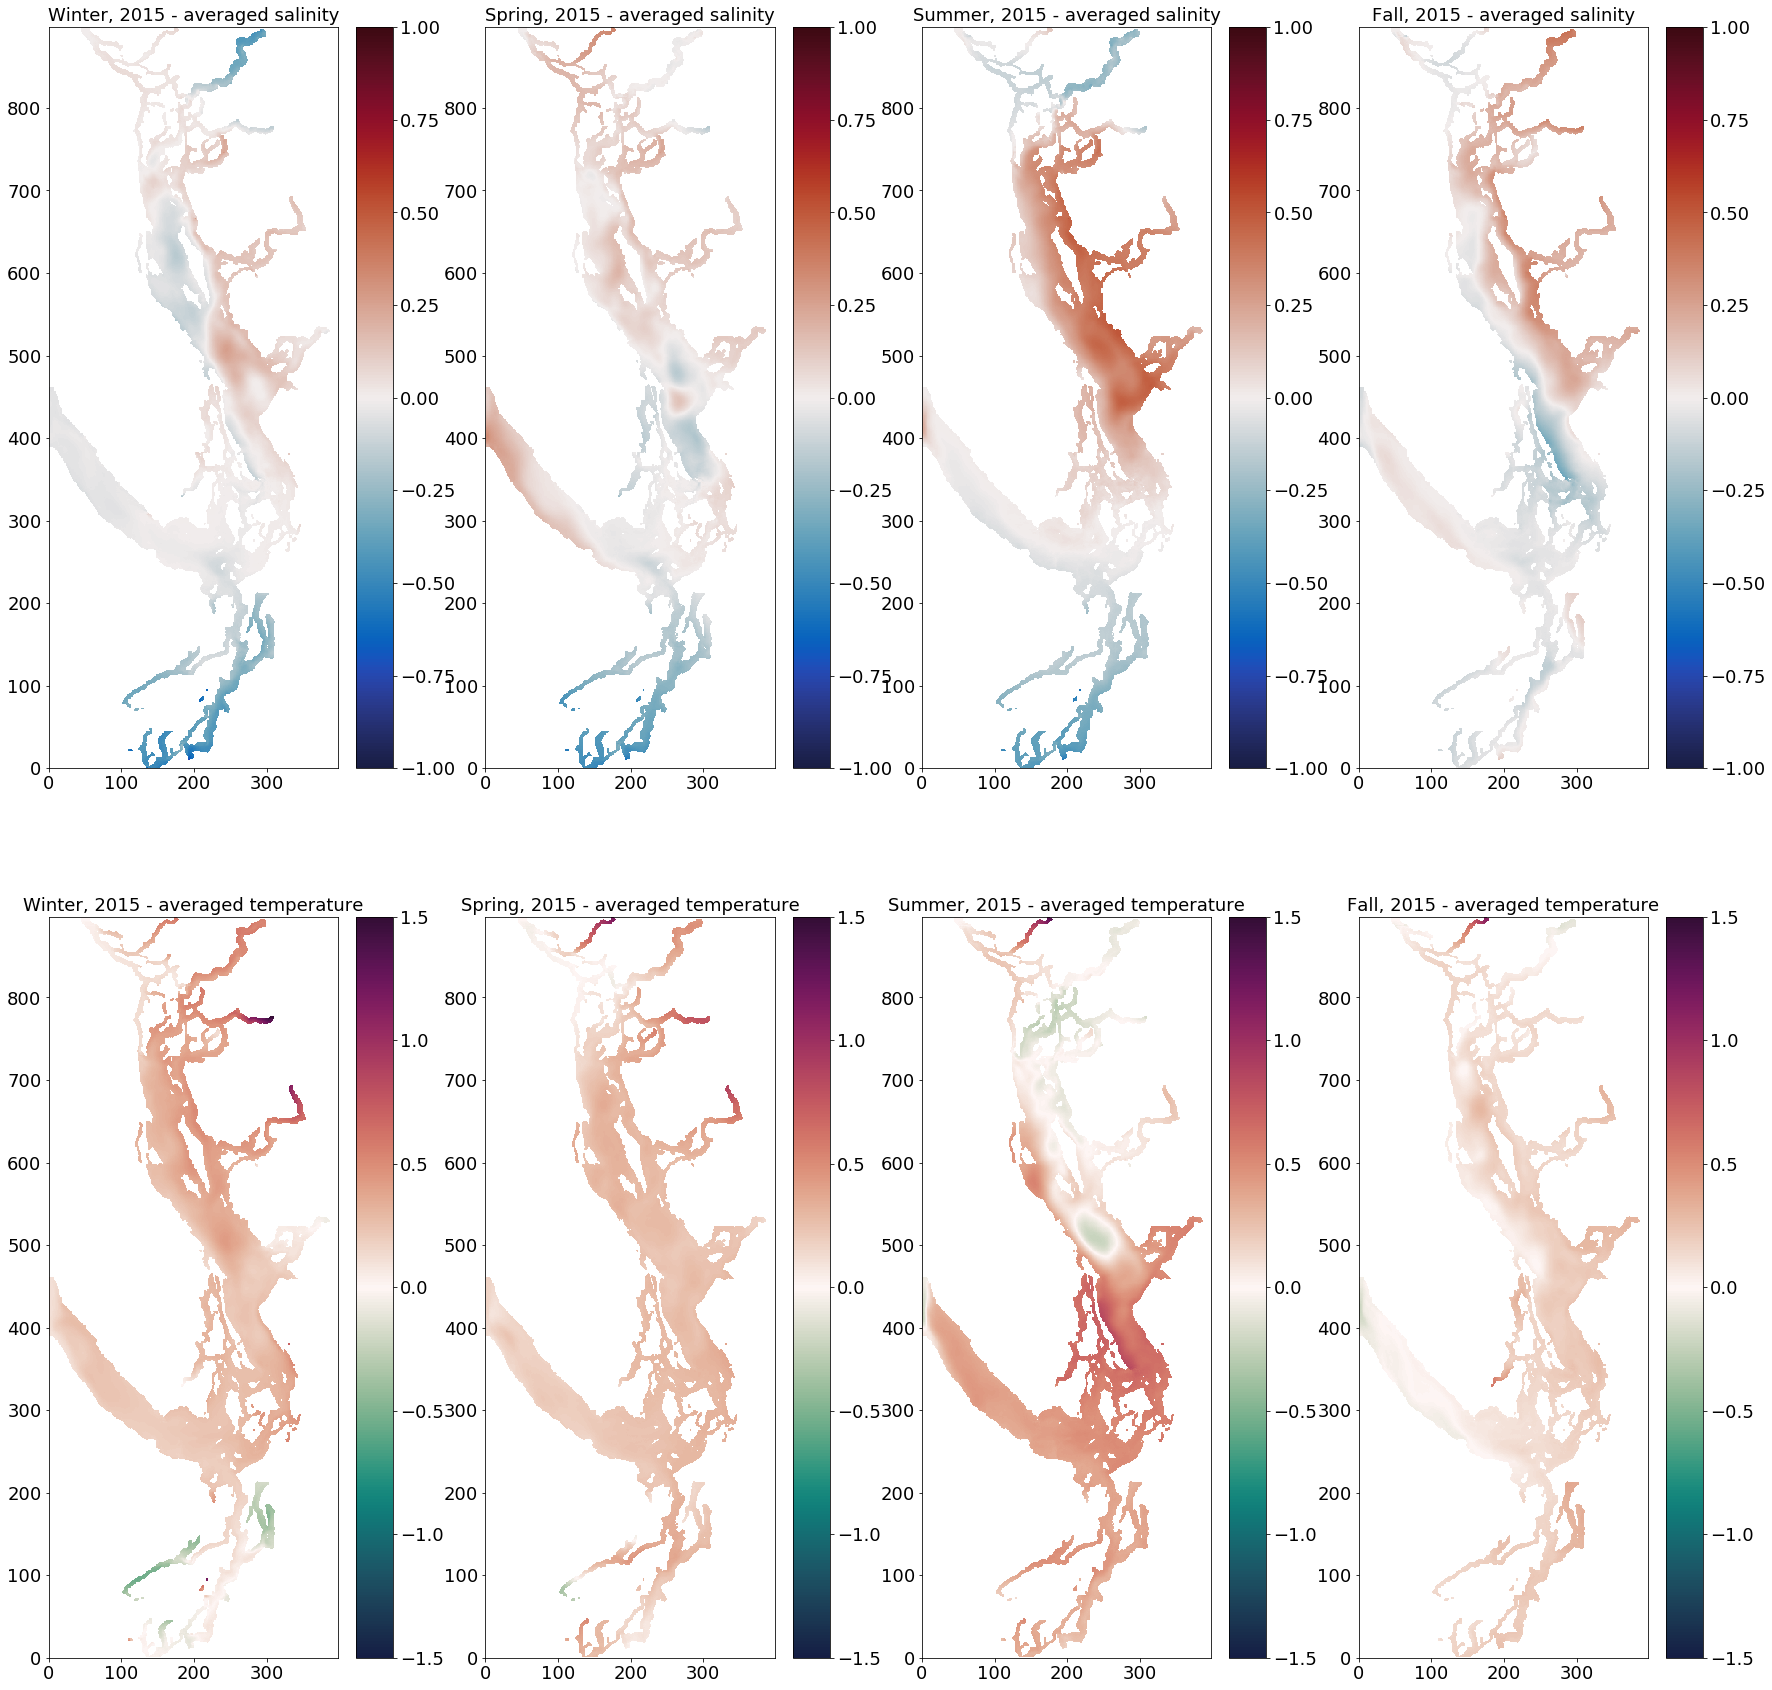

In [22]:
fig, axs = plt.subplots(2,4,figsize = (30,30))

s = axs[0,0].pcolormesh(np.ma.masked_array(f2015top.variables['vosalineoverdepth'][0,...] 
                                           - s_averages[0,...], 
                                           mask = 1 - mesh.variables['tmask'][0,22,...]), 
                        cmap = cmocean.cm.balance, vmin = -1, vmax = 1)
fig.colorbar(s, ax=axs[0,0])
viz_tools.set_aspect(axs[0,0])
axs[0,0].set_title('Winter, 2015 - averaged salinity')
t = axs[1,0].pcolormesh(np.ma.masked_array(f2015top.variables['votemperoverdepth'][0,...] 
                                           - t_averages[0,...], 
                                           mask = 1 - mesh.variables['tmask'][0,22,...]), 
                        cmap = cmocean.cm.curl, vmin = -1.5, vmax = 1.5)
fig.colorbar(t, ax=axs[1,0])
viz_tools.set_aspect(axs[1,0])
axs[1,0].set_title('Winter, 2015 - averaged temperature')

s = axs[0,1].pcolormesh(np.ma.masked_array(f2015top.variables['vosalineoverdepth'][1,...] 
                                           - s_averages[1,...], 
                                           mask = 1 - mesh.variables['tmask'][0,22,...]), 
                        cmap = cmocean.cm.balance, vmin = -1, vmax = 1)
fig.colorbar(s, ax=axs[0,1])
viz_tools.set_aspect(axs[0,1])
axs[0,1].set_title('Spring, 2015 - averaged salinity')
t = axs[1,1].pcolormesh(np.ma.masked_array(f2015top.variables['votemperoverdepth'][1,...] 
                                           - t_averages[1,...], 
                                           mask = 1 - mesh.variables['tmask'][0,22,...]), 
                        cmap = cmocean.cm.curl, vmin = -1.5, vmax = 1.5)
fig.colorbar(t, ax=axs[1,1])
viz_tools.set_aspect(axs[1,1])
axs[1,1].set_title('Spring, 2015 - averaged temperature')


s = axs[0,2].pcolormesh(np.ma.masked_array(f2015top.variables['vosalineoverdepth'][2,...] 
                                           - s_averages[2,...], 
                                           mask = 1 - mesh.variables['tmask'][0,22,...]), 
                        cmap = cmocean.cm.balance, vmin = -1, vmax = 1)
fig.colorbar(s, ax=axs[0,2])
viz_tools.set_aspect(axs[0,2])
axs[0,2].set_title('Summer, 2015 - averaged salinity')
t = axs[1,2].pcolormesh(np.ma.masked_array(f2015top.variables['votemperoverdepth'][2,...] 
                                           - t_averages[2,...], 
                                           mask = 1 - mesh.variables['tmask'][0,22,...]), 
                        cmap = cmocean.cm.curl, vmin = -1.5, vmax = 1.5)
fig.colorbar(t, ax=axs[1,2])
viz_tools.set_aspect(axs[1,2])
axs[1,2].set_title('Summer, 2015 - averaged temperature')

s = axs[0,3].pcolormesh(np.ma.masked_array(f2015top.variables['vosalineoverdepth'][3,...] 
                                           - s_averages[3,...], 
                                           mask = 1 - mesh.variables['tmask'][0,22,...]), 
                        cmap = cmocean.cm.balance, vmin = -1, vmax = 1)
fig.colorbar(s, ax=axs[0,3])
viz_tools.set_aspect(axs[0,3])
axs[0,3].set_title('Fall, 2015 - averaged salinity')
t = axs[1,3].pcolormesh(np.ma.masked_array(f2015top.variables['votemperoverdepth'][3,...] 
                                           - t_averages[3,...], 
                                           mask = 1 - mesh.variables['tmask'][0,22,...]), 
                        cmap = cmocean.cm.curl, vmin = -1.5, vmax = 1.5)
fig.colorbar(t, ax=axs[1,3])
viz_tools.set_aspect(axs[1,3])
axs[1,3].set_title('Fall, 2015 - averaged temperature');

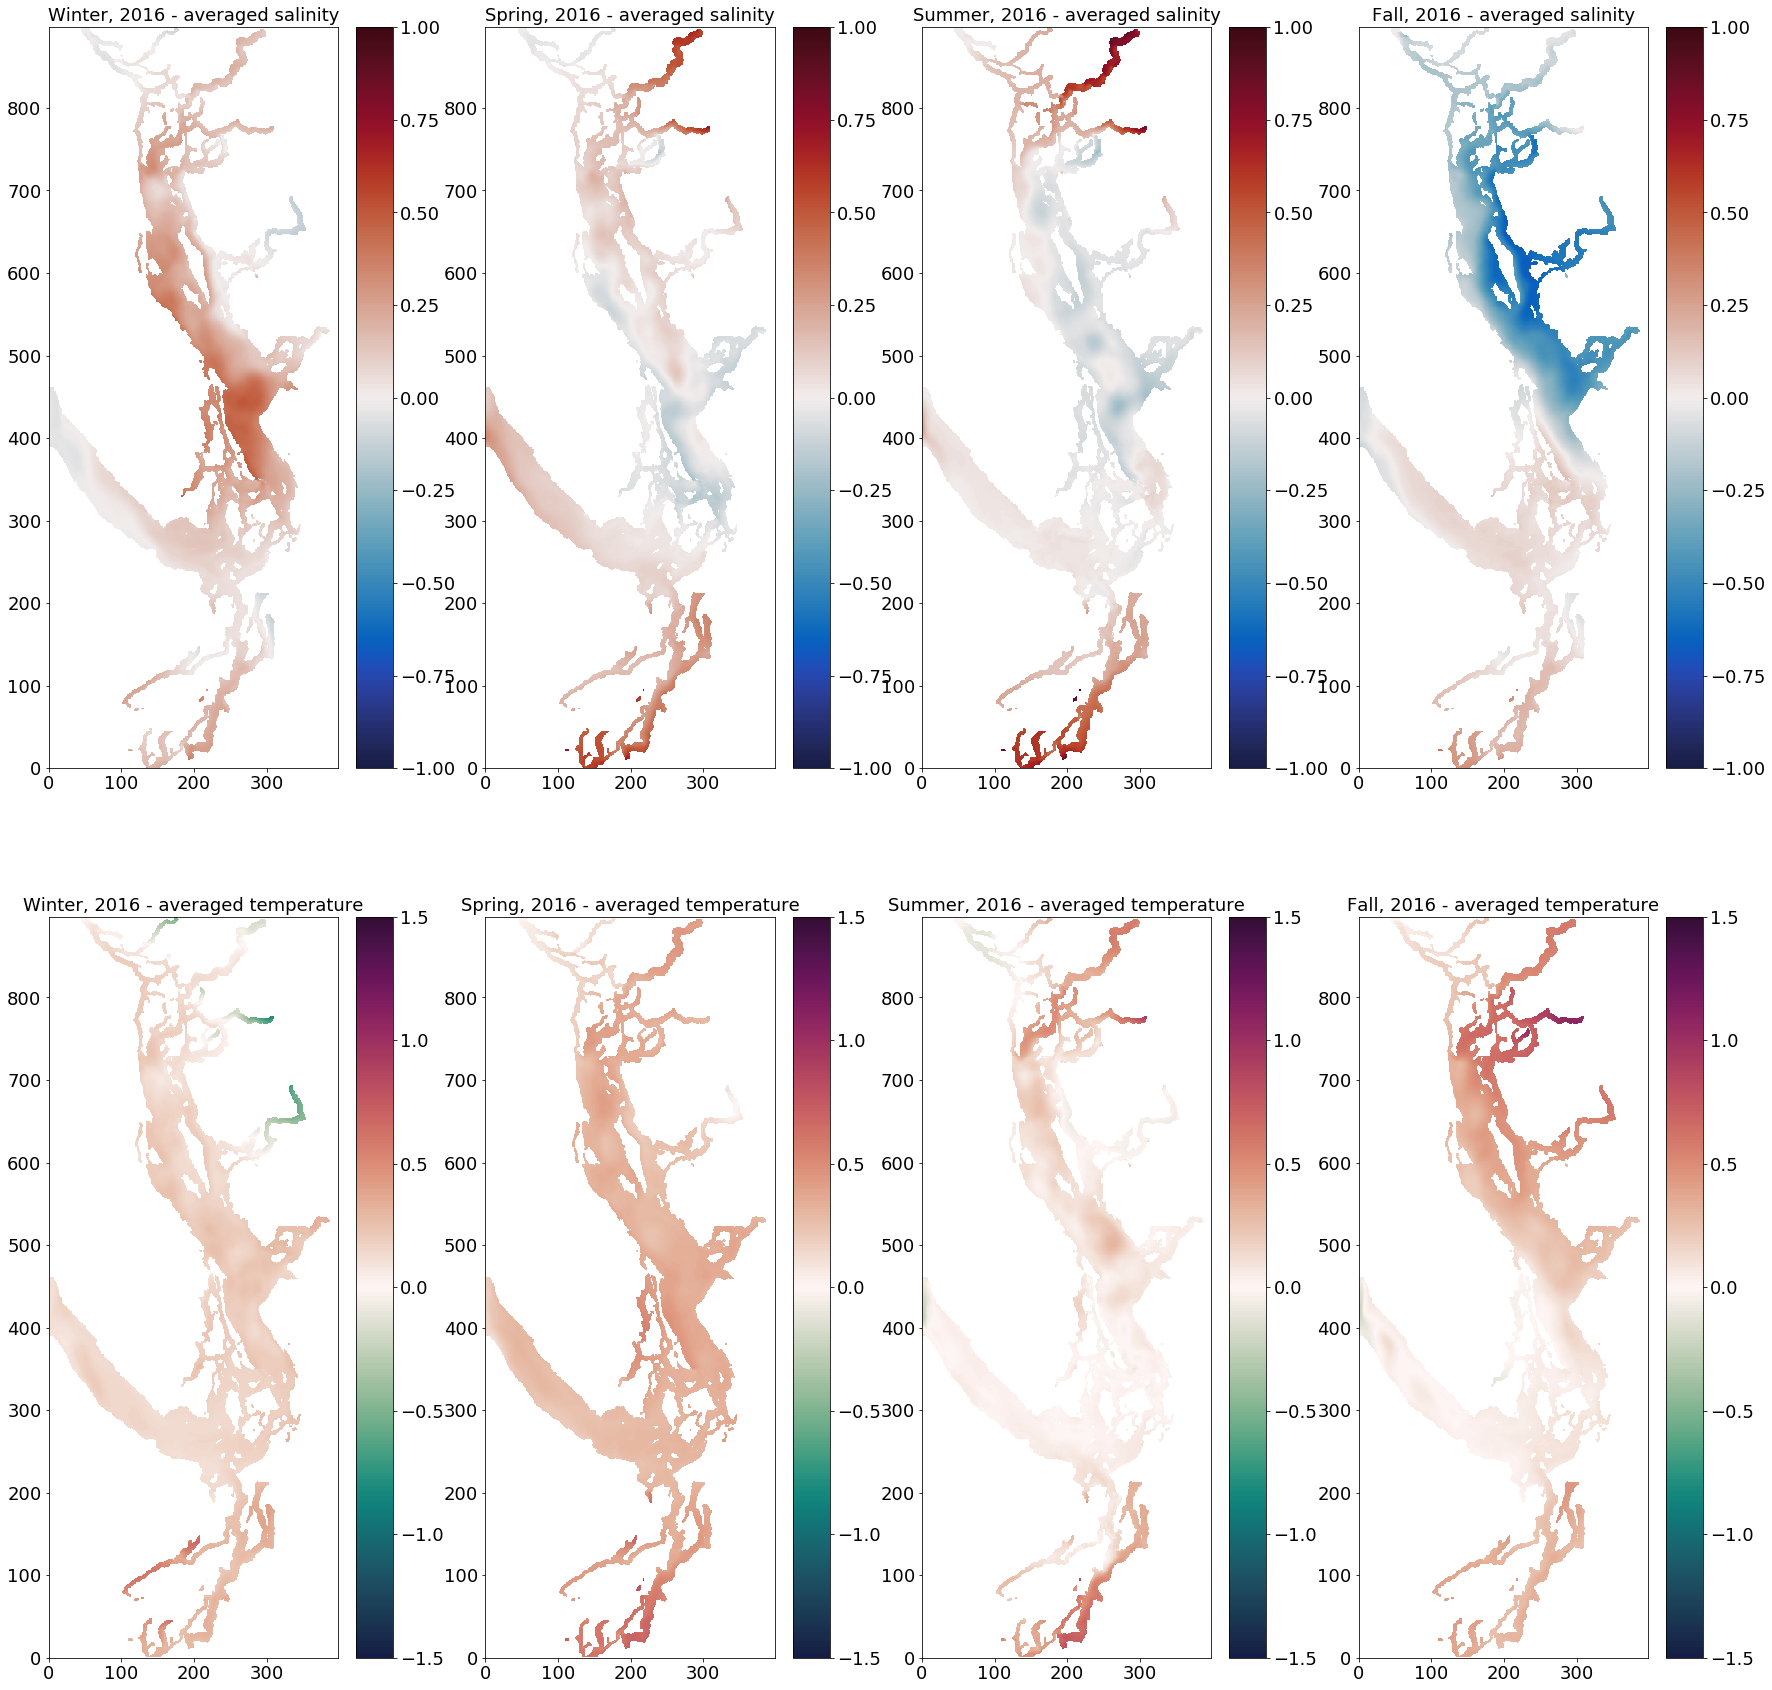

In [23]:
fig, axs = plt.subplots(2,4,figsize = (30,30))

s = axs[0,0].pcolormesh(np.ma.masked_array(f2016top.variables['vosalineoverdepth'][0,...] 
                                           - s_averages[0,...], 
                                           mask = 1 - mesh.variables['tmask'][0,22,...]), 
                        cmap = cmocean.cm.balance, vmin = -1, vmax = 1)
fig.colorbar(s, ax=axs[0,0])
viz_tools.set_aspect(axs[0,0])
axs[0,0].set_title('Winter, 2016 - averaged salinity')
t = axs[1,0].pcolormesh(np.ma.masked_array(f2016top.variables['votemperoverdepth'][0,...] 
                                           - t_averages[0,...], 
                                           mask = 1 - mesh.variables['tmask'][0,22,...]), 
                        cmap = cmocean.cm.curl, vmin = -1.5, vmax = 1.5)
fig.colorbar(t, ax=axs[1,0])
viz_tools.set_aspect(axs[1,0])
axs[1,0].set_title('Winter, 2016 - averaged temperature')

s = axs[0,1].pcolormesh(np.ma.masked_array(f2016top.variables['vosalineoverdepth'][1,...] 
                                           - s_averages[1,...], 
                                           mask = 1 - mesh.variables['tmask'][0,22,...]), 
                        cmap = cmocean.cm.balance, vmin = -1, vmax = 1)
fig.colorbar(s, ax=axs[0,1])
viz_tools.set_aspect(axs[0,1])
axs[0,1].set_title('Spring, 2016 - averaged salinity')
t = axs[1,1].pcolormesh(np.ma.masked_array(f2016top.variables['votemperoverdepth'][1,...] 
                                           - t_averages[1,...], 
                                           mask = 1 - mesh.variables['tmask'][0,22,...]), 
                        cmap = cmocean.cm.curl, vmin = -1.5, vmax = 1.5)
fig.colorbar(t, ax=axs[1,1])
viz_tools.set_aspect(axs[1,1])
axs[1,1].set_title('Spring, 2016 - averaged temperature')

s = axs[0,2].pcolormesh(np.ma.masked_array(f2016top.variables['vosalineoverdepth'][2,...] 
                                           - s_averages[2,...], 
                                           mask = 1 - mesh.variables['tmask'][0,22,...]), 
                        cmap = cmocean.cm.balance, vmin = -1, vmax = 1)
fig.colorbar(s, ax=axs[0,2])
viz_tools.set_aspect(axs[0,2])
axs[0,2].set_title('Summer, 2016 - averaged salinity')
t = axs[1,2].pcolormesh(np.ma.masked_array(f2016top.variables['votemperoverdepth'][2,...] 
                                           - t_averages[2,...], 
                                           mask = 1 - mesh.variables['tmask'][0,22,...]), 
                        cmap = cmocean.cm.curl, vmin = -1.5, vmax = 1.5)
fig.colorbar(t, ax=axs[1,2])
viz_tools.set_aspect(axs[1,2])
axs[1,2].set_title('Summer, 2016 - averaged temperature')

s = axs[0,3].pcolormesh(np.ma.masked_array(f2016top.variables['vosalineoverdepth'][3,...] 
                                           - s_averages[3,...], 
                                           mask = 1 - mesh.variables['tmask'][0,22,...]), 
                        cmap = cmocean.cm.balance, vmin = -1, vmax = 1)
fig.colorbar(s, ax=axs[0,3])
viz_tools.set_aspect(axs[0,3])
axs[0,3].set_title('Fall, 2016 - averaged salinity')
t = axs[1,3].pcolormesh(np.ma.masked_array(f2016top.variables['votemperoverdepth'][3,...] 
                                           - t_averages[3,...], 
                                           mask = 1 - mesh.variables['tmask'][0,22,...]), 
                        cmap = cmocean.cm.curl, vmin = -1.5, vmax = 1.5)
fig.colorbar(t, ax=axs[1,3])
viz_tools.set_aspect(axs[1,3])
axs[1,3].set_title('Fall, 2016 - averaged temperature');

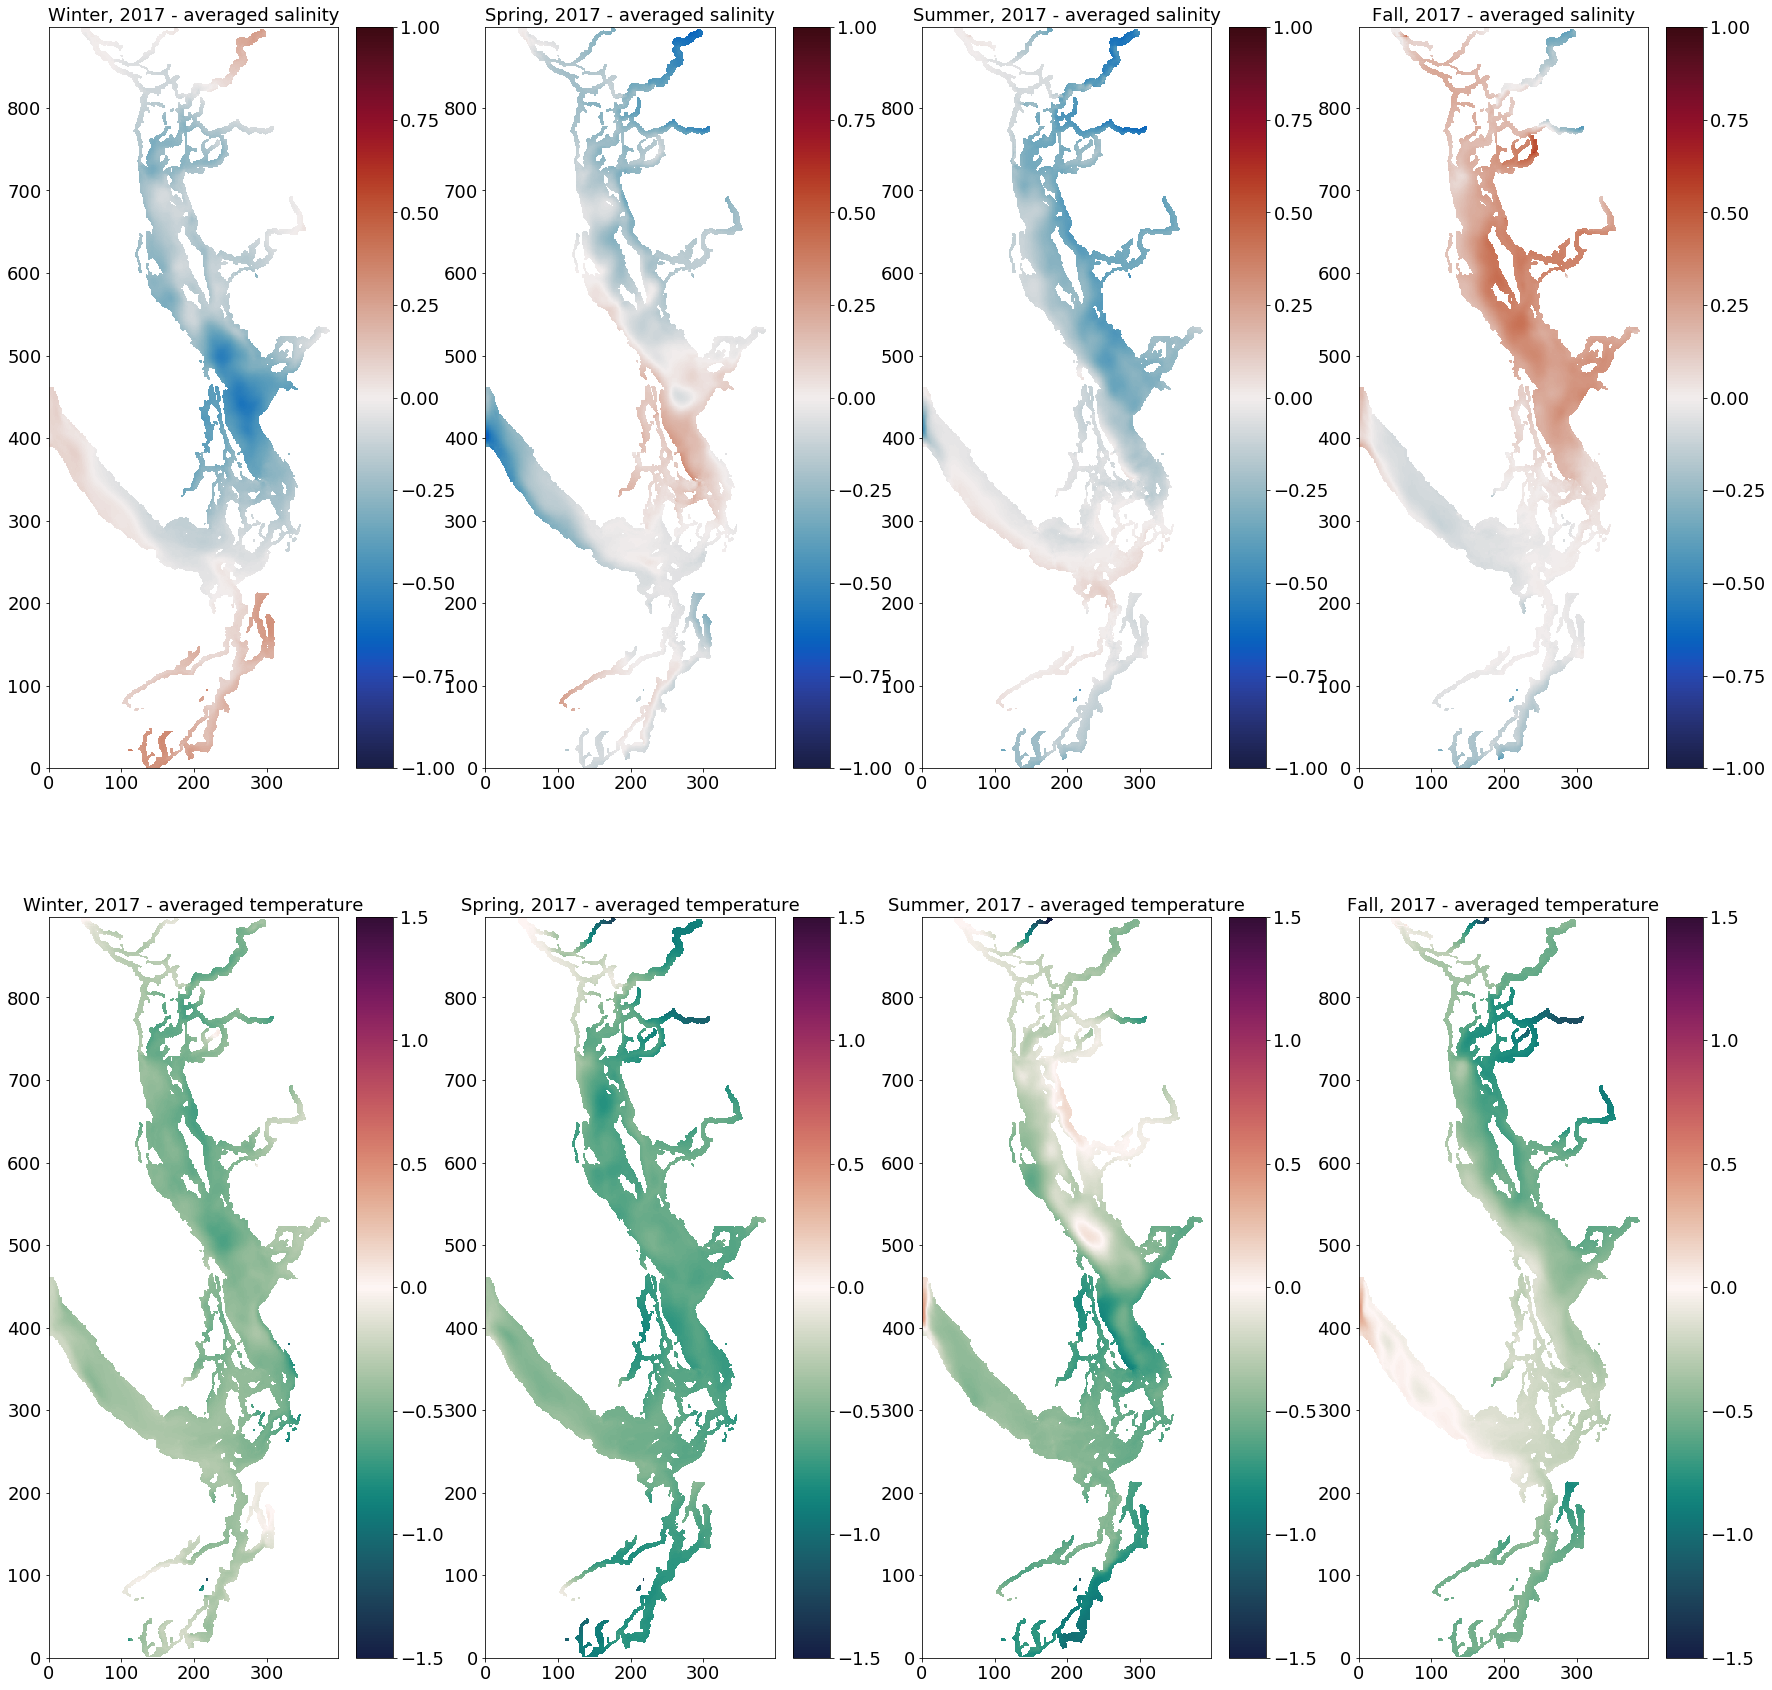

In [24]:
fig, axs = plt.subplots(2,4,figsize = (30,30))

s = axs[0,0].pcolormesh(np.ma.masked_array(f2017top.variables['vosalineoverdepth'][0,...] 
                                           - s_averages[0,...], 
                                           mask = 1 - mesh.variables['tmask'][0,22,...]), 
                        cmap = cmocean.cm.balance, vmin = -1, vmax = 1)
fig.colorbar(s, ax=axs[0,0])
viz_tools.set_aspect(axs[0,0])
axs[0,0].set_title('Winter, 2017 - averaged salinity')
t = axs[1,0].pcolormesh(np.ma.masked_array(f2017top.variables['votemperoverdepth'][0,...] 
                                           - t_averages[0,...], 
                                           mask = 1 - mesh.variables['tmask'][0,22,...]), 
                        cmap = cmocean.cm.curl, vmin = -1.5, vmax = 1.5)
fig.colorbar(t, ax=axs[1,0])
viz_tools.set_aspect(axs[1,0])
axs[1,0].set_title('Winter, 2017 - averaged temperature')

s = axs[0,1].pcolormesh(np.ma.masked_array(f2017top.variables['vosalineoverdepth'][1,...] 
                                           - s_averages[1,...], 
                                           mask = 1 - mesh.variables['tmask'][0,22,...]), 
                        cmap = cmocean.cm.balance, vmin = -1, vmax = 1)
fig.colorbar(s, ax=axs[0,1])
viz_tools.set_aspect(axs[0,1])
axs[0,1].set_title('Spring, 2017 - averaged salinity')
t = axs[1,1].pcolormesh(np.ma.masked_array(f2017top.variables['votemperoverdepth'][1,...] 
                                           - t_averages[1,...], 
                                           mask = 1 - mesh.variables['tmask'][0,22,...]), 
                        cmap = cmocean.cm.curl, vmin = -1.5, vmax = 1.5)
fig.colorbar(t, ax=axs[1,1])
viz_tools.set_aspect(axs[1,1])
axs[1,1].set_title('Spring, 2017 - averaged temperature')


s = axs[0,2].pcolormesh(np.ma.masked_array(f2017top.variables['vosalineoverdepth'][2,...] 
                                           - s_averages[2,...], 
                                           mask = 1 - mesh.variables['tmask'][0,22,...]), 
                        cmap = cmocean.cm.balance, vmin = -1, vmax = 1)
fig.colorbar(s, ax=axs[0,2])
viz_tools.set_aspect(axs[0,2])
axs[0,2].set_title('Summer, 2017 - averaged salinity')
t = axs[1,2].pcolormesh(np.ma.masked_array(f2017top.variables['votemperoverdepth'][2,...] 
                                           - t_averages[2,...], 
                                           mask = 1 - mesh.variables['tmask'][0,22,...]), 
                        cmap = cmocean.cm.curl, vmin = -1.5, vmax = 1.5)
fig.colorbar(t, ax=axs[1,2])
viz_tools.set_aspect(axs[1,2])
axs[1,2].set_title('Summer, 2017 - averaged temperature')

s = axs[0,3].pcolormesh(np.ma.masked_array(f2017top.variables['vosalineoverdepth'][3,...] 
                                           - s_averages[3,...], 
                                           mask = 1 - mesh.variables['tmask'][0,22,...]), 
                        cmap = cmocean.cm.balance, vmin = -1, vmax = 1)
fig.colorbar(s, ax=axs[0,3])
viz_tools.set_aspect(axs[0,3])
axs[0,3].set_title('Fall, 2017 - averaged salinity')
t = axs[1,3].pcolormesh(np.ma.masked_array(f2017top.variables['votemperoverdepth'][3,...] 
                                           - t_averages[3,...], 
                                           mask = 1 - mesh.variables['tmask'][0,22,...]), 
                        cmap = cmocean.cm.curl, vmin = -1.5, vmax = 1.5)
fig.colorbar(t, ax=axs[1,3])
viz_tools.set_aspect(axs[1,3])
axs[1,3].set_title('Fall, 2017 - averaged temperature');

In [46]:
t_deep_averages = (f2015deep.variables['deep_T'][:] 
                   + f2016deep.variables['deep_T'][:]
                   + f2017deep.variables['deep_T'][:])/3
s_deep_averages = (f2015deep.variables['deep_S'][:] 
                   + f2016deep.variables['deep_S'][:]
                   + f2017deep.variables['deep_S'][:])/3

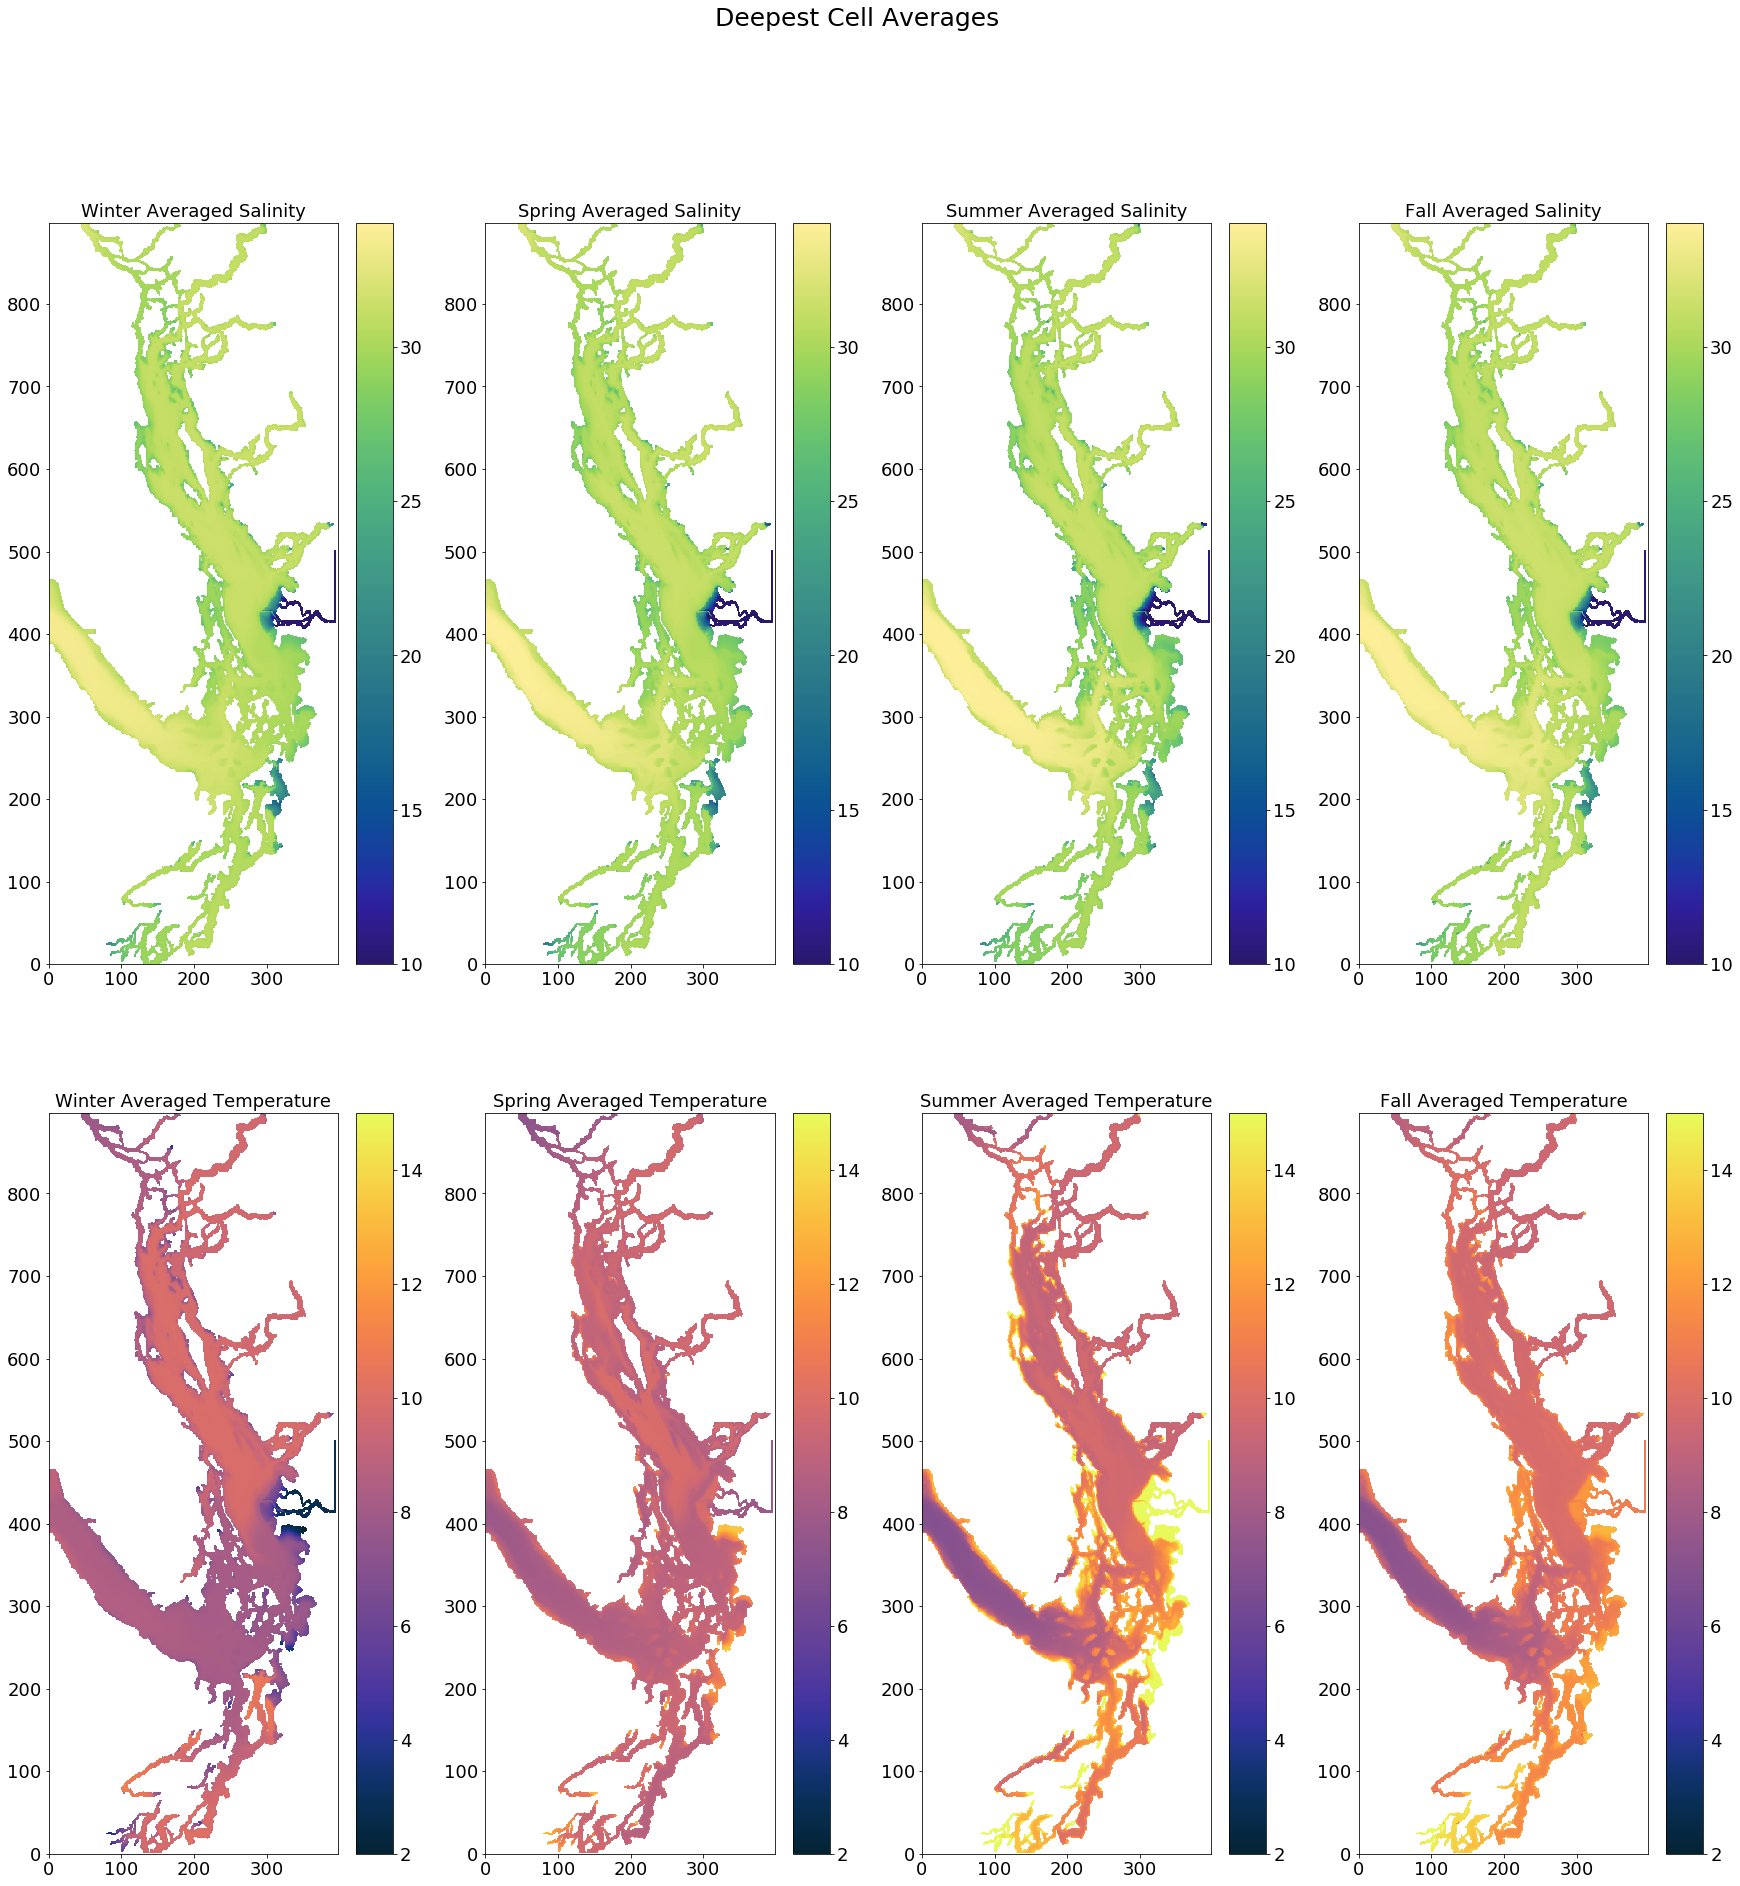

In [52]:
fig, axs = plt.subplots(2,4,figsize = (30,30))
fig.suptitle('Deepest Cell Averages', fontsize = 25)
s = axs[0,0].pcolormesh(s_deep_averages[0,...], cmap = cmocean.cm.haline, vmin = 10, vmax = 34)
fig.colorbar(s, ax=axs[0,0])
viz_tools.set_aspect(axs[0,0])
axs[0,0].set_title('Winter Averaged Salinity')
t = axs[1,0].pcolormesh(t_deep_averages[0,...], cmap = cmocean.cm.thermal, vmin = 2, vmax = 15)
fig.colorbar(t, ax=axs[1,0])
viz_tools.set_aspect(axs[1,0])
axs[1,0].set_title('Winter Averaged Temperature')

s = axs[0,1].pcolormesh(s_deep_averages[1,...], cmap = cmocean.cm.haline, vmin = 10, vmax = 34)
fig.colorbar(s, ax=axs[0,1])
viz_tools.set_aspect(axs[0,1])
axs[0,1].set_title('Spring Averaged Salinity')
t = axs[1,1].pcolormesh(t_deep_averages[1,...], cmap = cmocean.cm.thermal, vmin = 2, vmax = 15)
fig.colorbar(t, ax=axs[1,1])
viz_tools.set_aspect(axs[1,1])
axs[1,1].set_title('Spring Averaged Temperature')

s = axs[0,2].pcolormesh(s_deep_averages[2,...], cmap = cmocean.cm.haline, vmin = 10, vmax = 34)
fig.colorbar(s, ax=axs[0,2])
viz_tools.set_aspect(axs[0,2])
axs[0,2].set_title('Summer Averaged Salinity')
t = axs[1,2].pcolormesh(t_deep_averages[2,...], cmap = cmocean.cm.thermal, vmin = 2, vmax = 15)
fig.colorbar(t, ax=axs[1,2])
viz_tools.set_aspect(axs[1,2])
axs[1,2].set_title('Summer Averaged Temperature')

s = axs[0,3].pcolormesh(s_deep_averages[3,...], cmap = cmocean.cm.haline, vmin = 10, vmax = 34)
fig.colorbar(s, ax=axs[0,3])
viz_tools.set_aspect(axs[0,3])
axs[0,3].set_title('Fall Averaged Salinity')
t = axs[1,3].pcolormesh(t_deep_averages[3,...], cmap = cmocean.cm.thermal, vmin = 2, vmax = 15)
fig.colorbar(t, ax=axs[1,3])
viz_tools.set_aspect(axs[1,3])
axs[1,3].set_title('Fall Averaged Temperature');

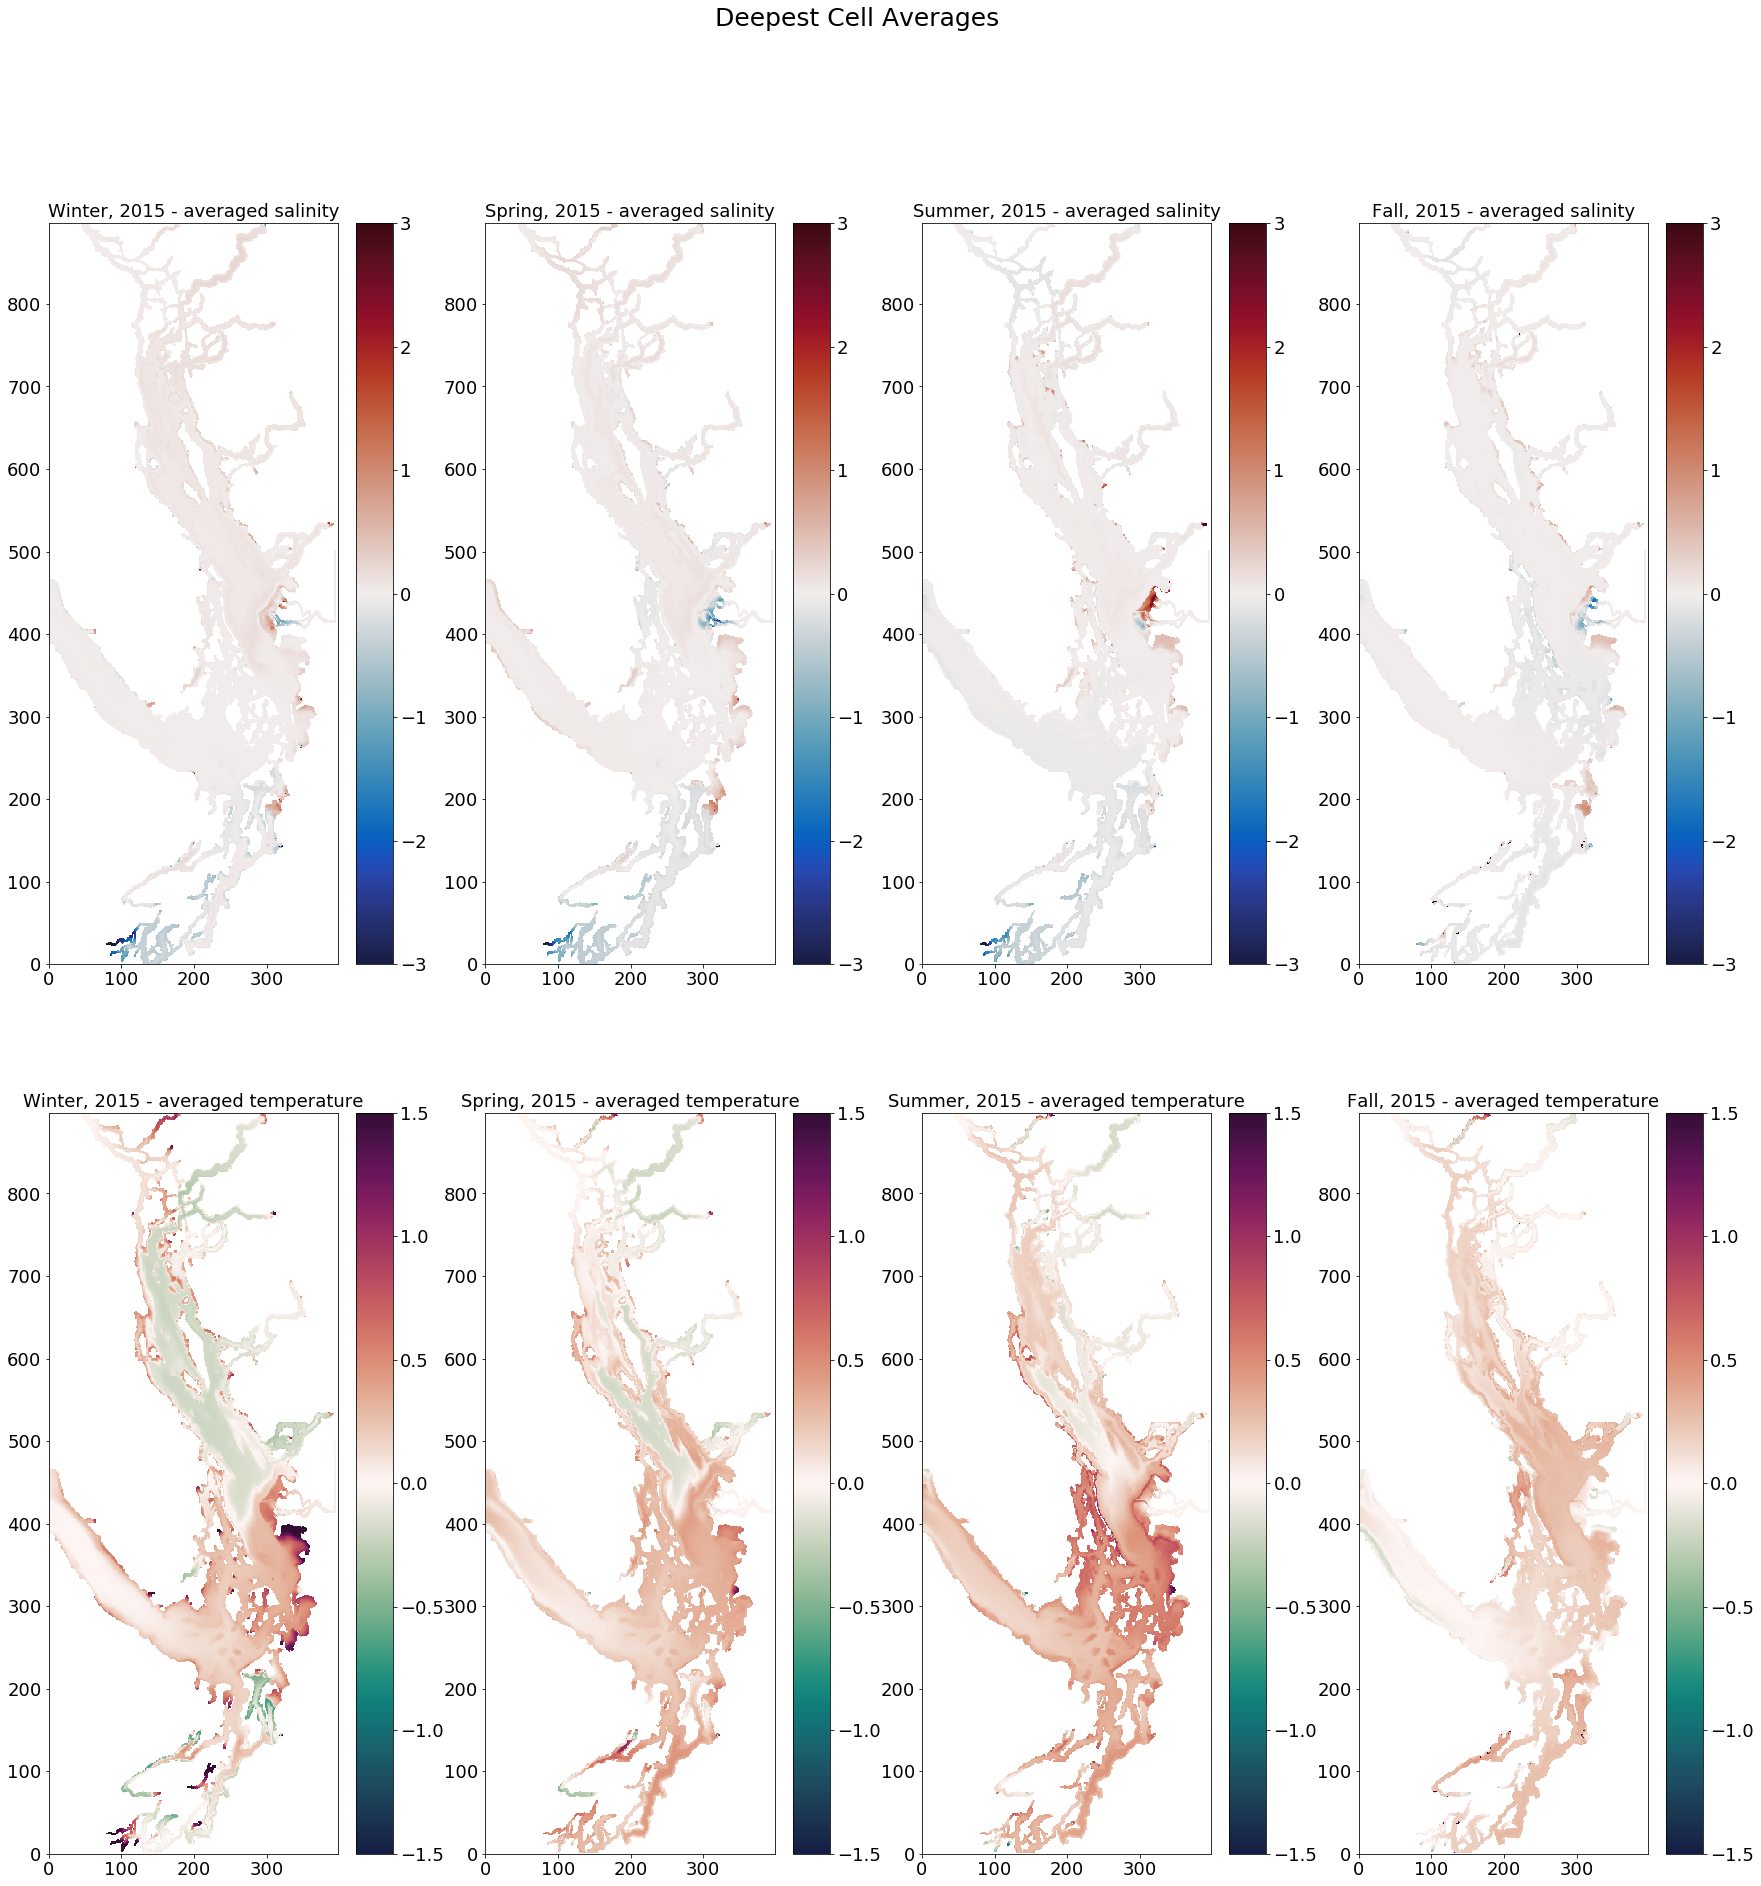

In [55]:
fig, axs = plt.subplots(2,4,figsize = (30,30))
fig.suptitle('Deepest Cell Averages', fontsize = 25)

s = axs[0,0].pcolormesh(f2015deep.variables['deep_S'][0,...] - s_deep_averages[0,...], 
                        cmap = cmocean.cm.balance, vmin = -3, vmax = 3)
fig.colorbar(s, ax=axs[0,0])
viz_tools.set_aspect(axs[0,0])
axs[0,0].set_title('Winter, 2015 - averaged salinity')
t = axs[1,0].pcolormesh(f2015deep.variables['deep_T'][0,...] - t_deep_averages[0,...], 
                        cmap = cmocean.cm.curl, vmin = -1.5, vmax = 1.5)
fig.colorbar(t, ax=axs[1,0])
viz_tools.set_aspect(axs[1,0])
axs[1,0].set_title('Winter, 2015 - averaged temperature')

s = axs[0,1].pcolormesh(f2015deep.variables['deep_S'][1,...] - s_deep_averages[1,...], 
                        cmap = cmocean.cm.balance, vmin = -3, vmax = 3)
fig.colorbar(s, ax=axs[0,1])
viz_tools.set_aspect(axs[0,1])
axs[0,1].set_title('Spring, 2015 - averaged salinity')
t = axs[1,1].pcolormesh(f2015deep.variables['deep_T'][1,...] - t_deep_averages[1,...], 
                        cmap = cmocean.cm.curl, vmin = -1.5, vmax = 1.5)
fig.colorbar(t, ax=axs[1,1])
viz_tools.set_aspect(axs[1,1])
axs[1,1].set_title('Spring, 2015 - averaged temperature')


s = axs[0,2].pcolormesh(f2015deep.variables['deep_S'][2,...] - s_deep_averages[2,...], 
                        cmap = cmocean.cm.balance, vmin = -3, vmax = 3)
fig.colorbar(s, ax=axs[0,2])
viz_tools.set_aspect(axs[0,2])
axs[0,2].set_title('Summer, 2015 - averaged salinity')
t = axs[1,2].pcolormesh(f2015deep.variables['deep_T'][2,...] - t_deep_averages[2,...], 
                        cmap = cmocean.cm.curl, vmin = -1.5, vmax = 1.5)
fig.colorbar(t, ax=axs[1,2])
viz_tools.set_aspect(axs[1,2])
axs[1,2].set_title('Summer, 2015 - averaged temperature')

s = axs[0,3].pcolormesh(f2015deep.variables['deep_S'][3,...] - s_deep_averages[3,...], 
                        cmap = cmocean.cm.balance, vmin = -3, vmax = 3)
fig.colorbar(s, ax=axs[0,3])
viz_tools.set_aspect(axs[0,3])
axs[0,3].set_title('Fall, 2015 - averaged salinity')
t = axs[1,3].pcolormesh(f2015deep.variables['deep_T'][3,...] - t_deep_averages[3,...], 
                        cmap = cmocean.cm.curl, vmin = -1.5, vmax = 1.5)
fig.colorbar(t, ax=axs[1,3])
viz_tools.set_aspect(axs[1,3])
axs[1,3].set_title('Fall, 2015 - averaged temperature');

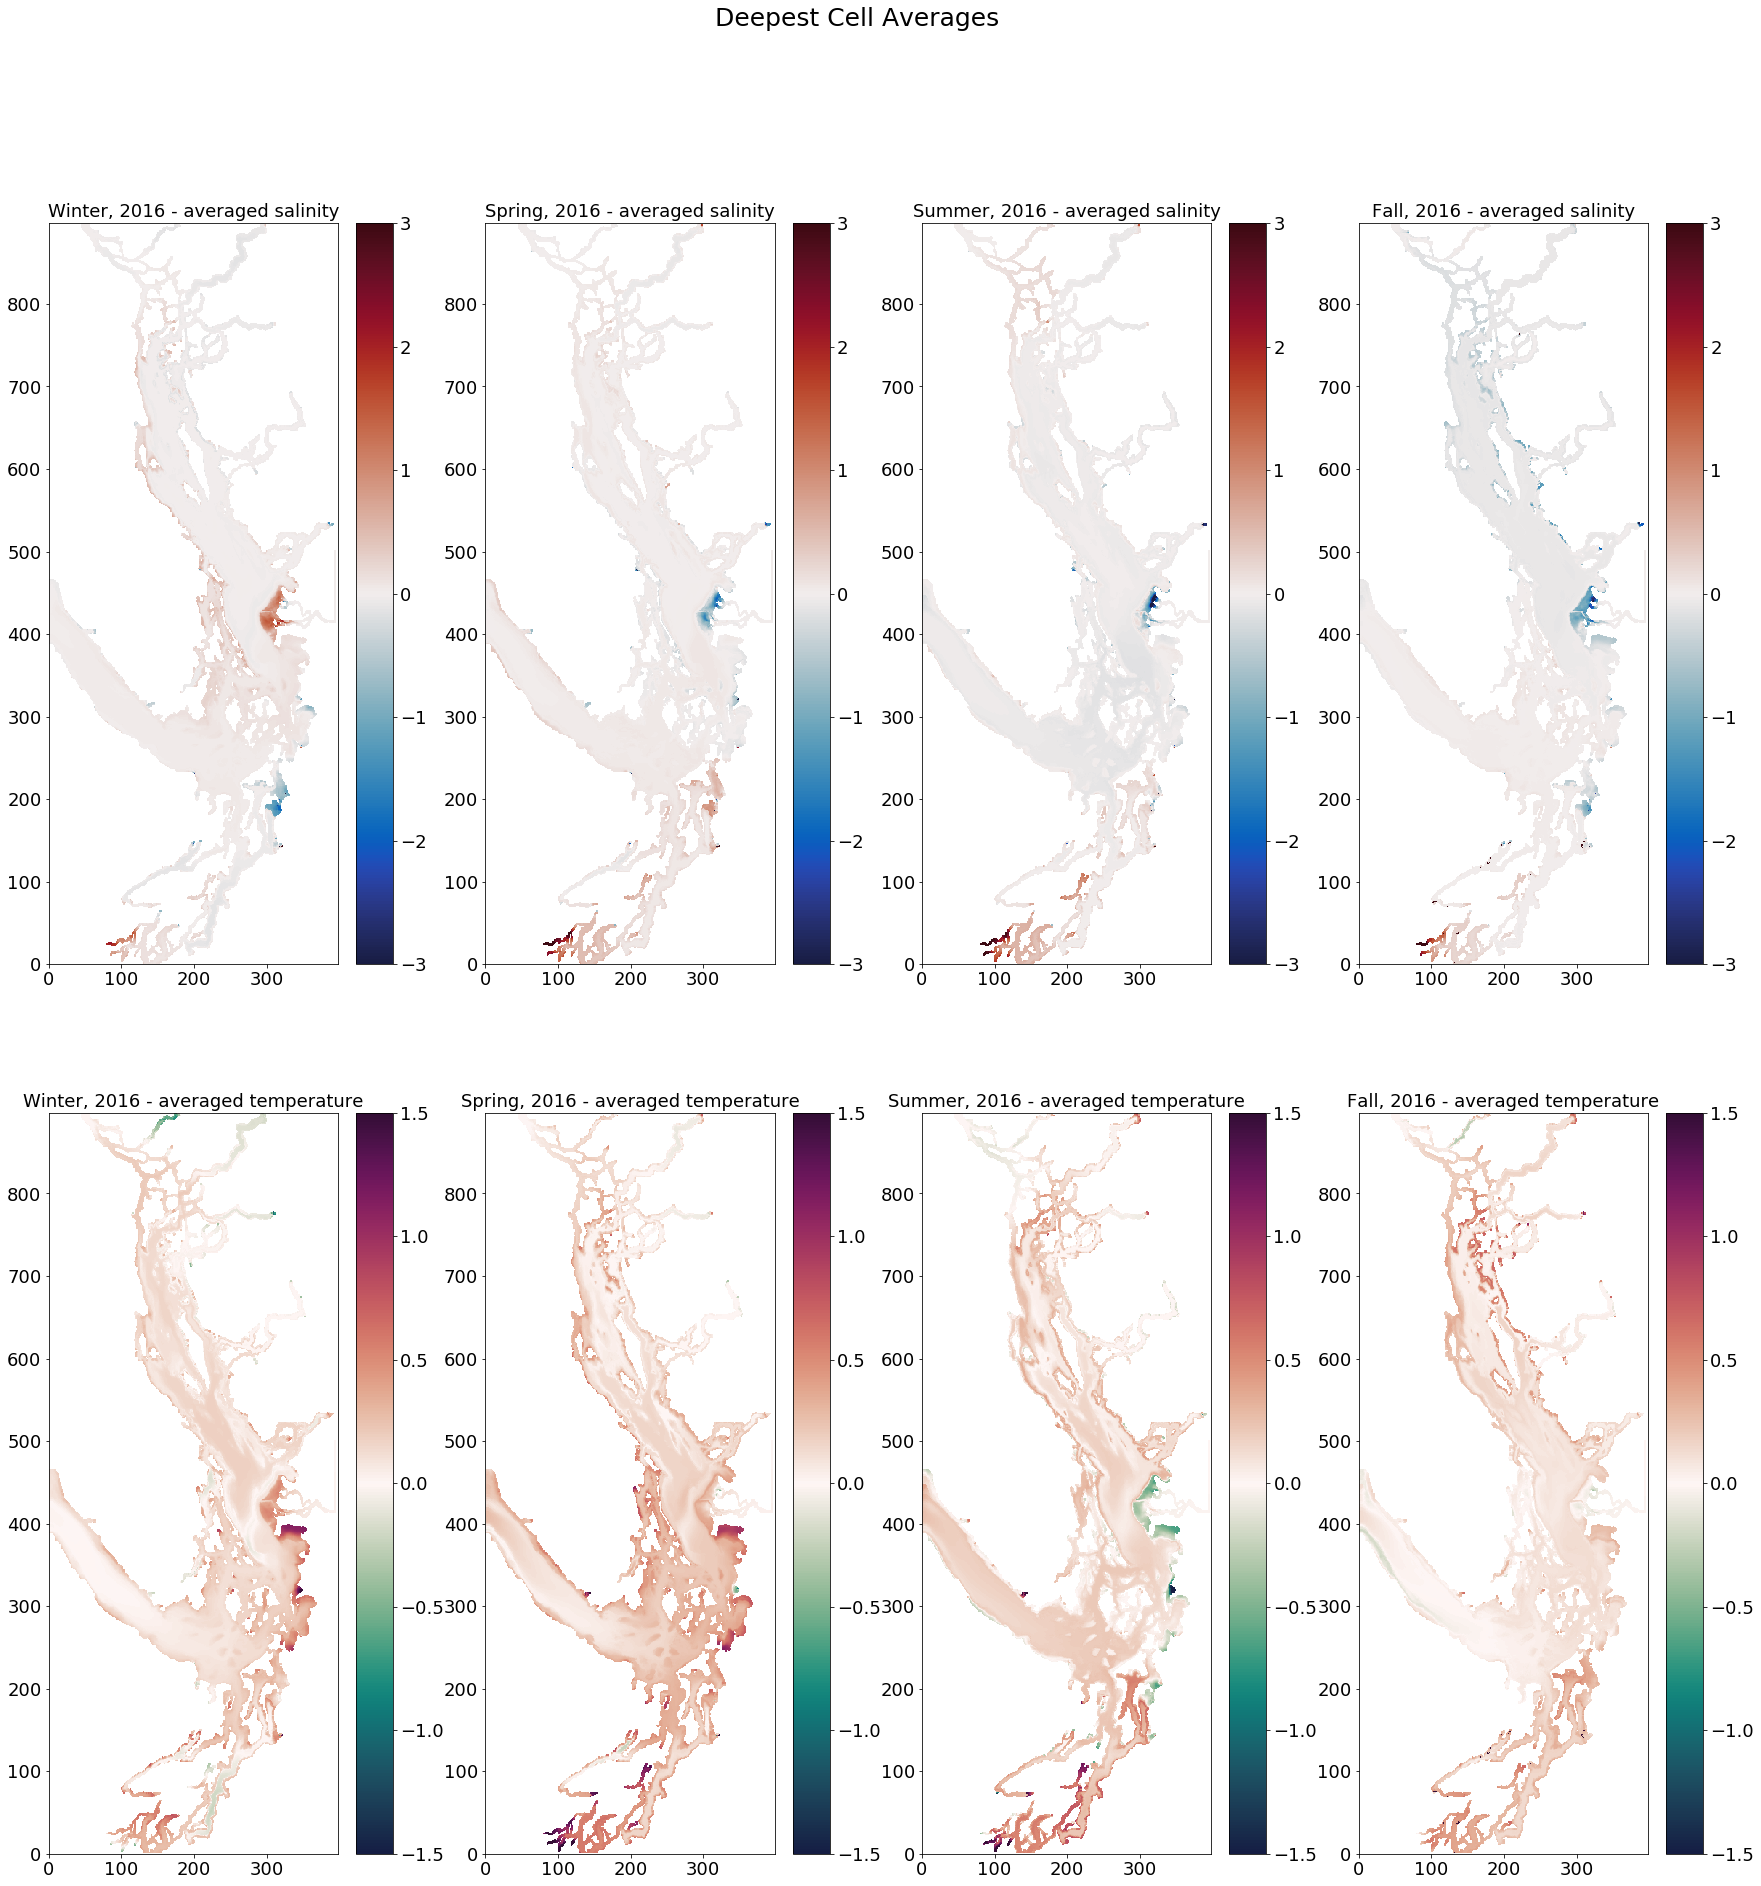

In [56]:
fig, axs = plt.subplots(2,4,figsize = (30,30))
fig.suptitle('Deepest Cell Averages', fontsize = 25)

s = axs[0,0].pcolormesh(f2016deep.variables['deep_S'][0,...] - s_deep_averages[0,...], 
                        cmap = cmocean.cm.balance, vmin = -3, vmax = 3)
fig.colorbar(s, ax=axs[0,0])
viz_tools.set_aspect(axs[0,0])
axs[0,0].set_title('Winter, 2016 - averaged salinity')
t = axs[1,0].pcolormesh(f2016deep.variables['deep_T'][0,...] - t_deep_averages[0,...], 
                        cmap = cmocean.cm.curl, vmin = -1.5, vmax = 1.5)
fig.colorbar(t, ax=axs[1,0])
viz_tools.set_aspect(axs[1,0])
axs[1,0].set_title('Winter, 2016 - averaged temperature')

s = axs[0,1].pcolormesh(f2016deep.variables['deep_S'][1,...] - s_deep_averages[1,...], 
                        cmap = cmocean.cm.balance, vmin = -3, vmax = 3)
fig.colorbar(s, ax=axs[0,1])
viz_tools.set_aspect(axs[0,1])
axs[0,1].set_title('Spring, 2016 - averaged salinity')
t = axs[1,1].pcolormesh(f2016deep.variables['deep_T'][1,...] - t_deep_averages[1,...], 
                        cmap = cmocean.cm.curl, vmin = -1.5, vmax = 1.5)
fig.colorbar(t, ax=axs[1,1])
viz_tools.set_aspect(axs[1,1])
axs[1,1].set_title('Spring, 2016 - averaged temperature')


s = axs[0,2].pcolormesh(f2016deep.variables['deep_S'][2,...] - s_deep_averages[2,...], 
                        cmap = cmocean.cm.balance, vmin = -3, vmax = 3)
fig.colorbar(s, ax=axs[0,2])
viz_tools.set_aspect(axs[0,2])
axs[0,2].set_title('Summer, 2016 - averaged salinity')
t = axs[1,2].pcolormesh(f2016deep.variables['deep_T'][2,...] - t_deep_averages[2,...], 
                        cmap = cmocean.cm.curl, vmin = -1.5, vmax = 1.5)
fig.colorbar(t, ax=axs[1,2])
viz_tools.set_aspect(axs[1,2])
axs[1,2].set_title('Summer, 2016 - averaged temperature')

s = axs[0,3].pcolormesh(f2016deep.variables['deep_S'][3,...] - s_deep_averages[3,...], 
                        cmap = cmocean.cm.balance, vmin = -3, vmax = 3)
fig.colorbar(s, ax=axs[0,3])
viz_tools.set_aspect(axs[0,3])
axs[0,3].set_title('Fall, 2016 - averaged salinity')
t = axs[1,3].pcolormesh(f2016deep.variables['deep_T'][3,...] - t_deep_averages[3,...], 
                        cmap = cmocean.cm.curl, vmin = -1.5, vmax = 1.5)
fig.colorbar(t, ax=axs[1,3])
viz_tools.set_aspect(axs[1,3])
axs[1,3].set_title('Fall, 2016 - averaged temperature');

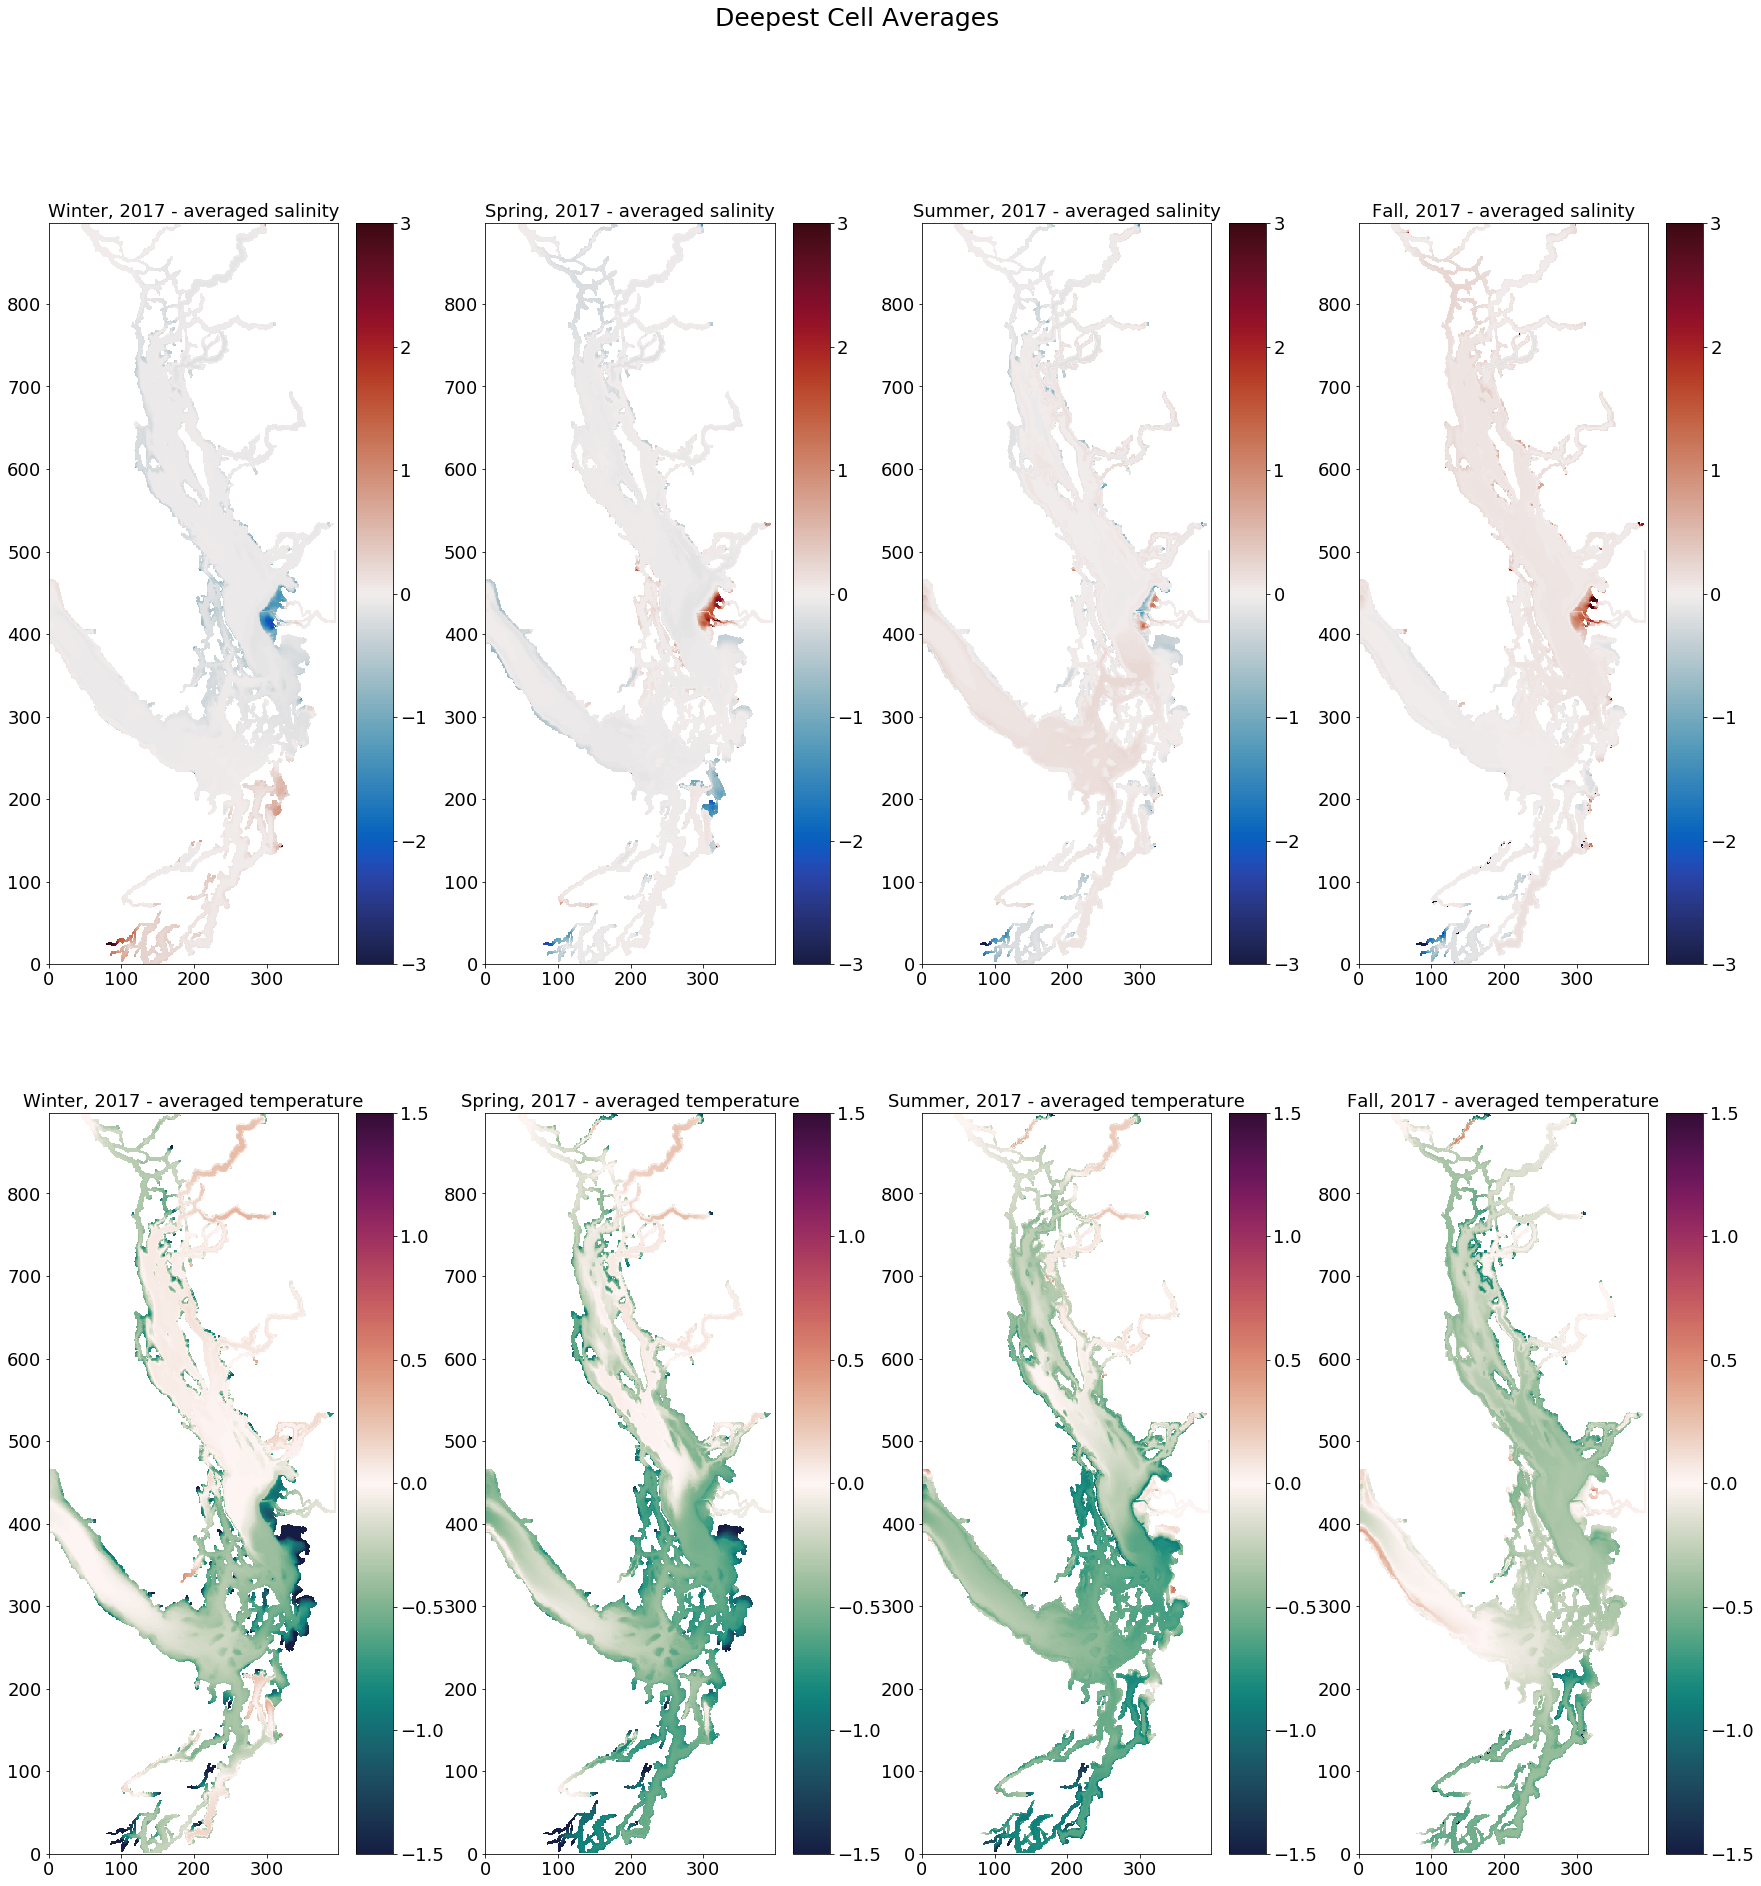

In [57]:
fig, axs = plt.subplots(2,4,figsize = (30,30))
fig.suptitle('Deepest Cell Averages', fontsize = 25)

s = axs[0,0].pcolormesh(f2017deep.variables['deep_S'][0,...] - s_deep_averages[0,...], 
                        cmap = cmocean.cm.balance, vmin = -3, vmax = 3)
fig.colorbar(s, ax=axs[0,0])
viz_tools.set_aspect(axs[0,0])
axs[0,0].set_title('Winter, 2017 - averaged salinity')
t = axs[1,0].pcolormesh(f2017deep.variables['deep_T'][0,...] - t_deep_averages[0,...], 
                        cmap = cmocean.cm.curl, vmin = -1.5, vmax = 1.5)
fig.colorbar(t, ax=axs[1,0])
viz_tools.set_aspect(axs[1,0])
axs[1,0].set_title('Winter, 2017 - averaged temperature')

s = axs[0,1].pcolormesh(f2017deep.variables['deep_S'][1,...] - s_deep_averages[1,...], 
                        cmap = cmocean.cm.balance, vmin = -3, vmax = 3)
fig.colorbar(s, ax=axs[0,1])
viz_tools.set_aspect(axs[0,1])
axs[0,1].set_title('Spring, 2017 - averaged salinity')
t = axs[1,1].pcolormesh(f2017deep.variables['deep_T'][1,...] - t_deep_averages[1,...], 
                        cmap = cmocean.cm.curl, vmin = -1.5, vmax = 1.5)
fig.colorbar(t, ax=axs[1,1])
viz_tools.set_aspect(axs[1,1])
axs[1,1].set_title('Spring, 2017 - averaged temperature')


s = axs[0,2].pcolormesh(f2017deep.variables['deep_S'][2,...] - s_deep_averages[2,...], 
                        cmap = cmocean.cm.balance, vmin = -3, vmax = 3)
fig.colorbar(s, ax=axs[0,2])
viz_tools.set_aspect(axs[0,2])
axs[0,2].set_title('Summer, 2017 - averaged salinity')
t = axs[1,2].pcolormesh(f2017deep.variables['deep_T'][2,...] - t_deep_averages[2,...], 
                        cmap = cmocean.cm.curl, vmin = -1.5, vmax = 1.5)
fig.colorbar(t, ax=axs[1,2])
viz_tools.set_aspect(axs[1,2])
axs[1,2].set_title('Summer, 2017 - averaged temperature')

s = axs[0,3].pcolormesh(f2017deep.variables['deep_S'][3,...] - s_deep_averages[3,...], 
                        cmap = cmocean.cm.balance, vmin = -3, vmax = 3)
fig.colorbar(s, ax=axs[0,3])
viz_tools.set_aspect(axs[0,3])
axs[0,3].set_title('Fall, 2017 - averaged salinity')
t = axs[1,3].pcolormesh(f2017deep.variables['deep_T'][3,...] - t_deep_averages[3,...], 
                        cmap = cmocean.cm.curl, vmin = -1.5, vmax = 1.5)
fig.colorbar(t, ax=axs[1,3])
viz_tools.set_aspect(axs[1,3])
axs[1,3].set_title('Fall, 2017 - averaged temperature');

In [58]:
n = nc.Dataset('/data/vdo/MEOPAR/for-devin/all_years_averages.nc', 'w')

In [61]:
time = n.createDimension("time_counter", None)
y = n.createDimension("y", 898)
x = n.createDimension("x", 398)

In [63]:
times = n.createVariable("time","f8",("time_counter",))
top_T = n.createVariable("top_votemper","f4",("time_counter","y", "x"))
top_S = n.createVariable("top_vosaline","f4",("time_counter","y", "x"))
deep_T = n.createVariable("deep_votemper","f4",("time_counter","y", "x"))
deep_S = n.createVariable("deep_vosaline","f4",("time_counter","y", "x"))

In [66]:
dates = [datetime.datetime(2016, 1, 15, 12, 0), datetime.datetime(2016, 4, 16, 0, 0),
         datetime.datetime(2016, 7, 17, 0, 0), datetime.datetime(2016, 10, 16, 12, 0)]

In [68]:
f2015deep.variables['time_counter'].units

'seconds since 1900-01-01 00:00:00'

In [70]:
times[:] = nc.date2num(dates,'seconds since 1900-01-01 00:00:00')

In [71]:
top_T[:] = t_averages
top_S[:] = s_averages
deep_T = t_deep_averages
deep_S = s_deep_averages

In [74]:
n.close()